In [2]:
# part1. Counting/Frequency
# Q1. From data1.csv, calculate the frequency of the word "city"
# Q2. From data1.csv, calculate the frequency of the word "there"
# Q3. From data1.csv, calculate the frequency of the word ".".
# Q4. Compute the following: P(Will | I)

import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# open file and save as list
f = open("data1.csv", "r", encoding="utf-8")
rdr = csv.reader(f)

data_list = []

for line in rdr:
    data_list.append(",".join(line))
f.close()

# Q1~Q3) define find word function
def search(word, data):
    count = 0
    for line in data:
        count += line.count(word)
    
    return count

cities = search("city", data_list)
theres = search("there", data_list)
periods = search(".", data_list)

print("-------------------part1-------------------")
print(f'Q1) count of "city" : {cities}')
print(f'Q2) count of "there" : {theres}')
print(f'Q3) count of "." : {periods}')

# Q4) P(Will | I)
word1 = "will"
word2 = "I"

def get_probability(word, condition, data):
    temp = 0
    case = 0
    
    for line in data:
        if condition in line:
            case += 1
            if word in line:
                temp += 1
    return temp/case

prob = get_probability(word1, word2, data_list)
print(f'Q4) P(will | I) = {prob}')

# Part2. Data Cleaning and Frequency

print("\n-------------------part2-------------------")
# Q5. 1) remove all empty lines. 2) remove all digits/numbers except period (.)

## 5-1) remove all empty lines
df = pd.DataFrame(data_list, columns=["contents"])
print(f'before: {df.shape}')
df = df.drop(df[df["contents"]==""].index) 
print(f'after : {df.shape}')

## 5-2) remove all digits/numbers except period(.)
import re
def cleanText(text):
    return re.sub(r"[^a-zA-Z .]", '', text).strip()
    
df["contents"] = df["contents"].map(lambda x: cleanText(x))
print(df.head(), end='\n-----------------')



# Q6. Add the single space before  every peroid (".") so that period (".") can be considered as a word.

# def add_space(text):
#     return text.replace('.', ' .', text.count('.'))
def add_space(text):
    return re.sub("[.]", ' .', text)

df["contents"] = df["contents"].map(lambda x: add_space(x))
print(df.head())

# Q7. Find the total number of words after above text-processing step
# make dictionary and dict => dataframe
temp_dict = {}
for line in df["contents"]:
    word_list = line.split(' ')
    for word in word_list:
        if word not in temp_dict.keys():
            temp_dict[word] = 1
        else:
            temp_dict[word] += 1


print('-------------Q7 & Q8 ------------')
# Q7~8)
df_countwords = pd.DataFrame(list(temp_dict.items()), columns=["word", "count"])
df_countwords = df_countwords.sort_values(by=['count'], ascending=False)
print(df_countwords.head(10))

-------------------part1-------------------
Q1) count of "city" : 2797
Q2) count of "there" : 15003
Q3) count of "." : 109656
Q4) P(will | I) = 0.1757910353381813

-------------------part2-------------------
before: (352024, 1)
after : (266088, 1)
                                            contents
0  Stately plump Buck Mulligan came from the stai...
1  lather on which a mirror and a razor lay cross...
2  dressinggown ungirdled was sustained gently be...
3    morning air. He held the bowl aloft and intoned
5                            Introibo ad altare Dei.
-----------------                                            contents
0  Stately plump Buck Mulligan came from the stai...
1  lather on which a mirror and a razor lay cross...
2  dressinggown ungirdled was sustained gently be...
3   morning air . He held the bowl aloft and intoned
5                           Introibo ad altare Dei .
-------------Q7 & Q8 ------------
     word   count
6     the  210622
16    and  131436
11     of  

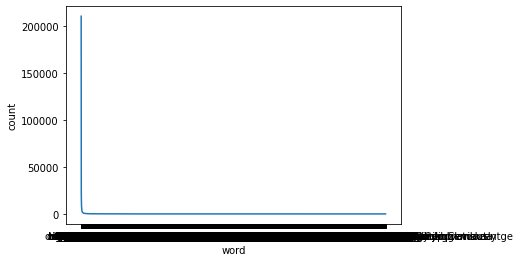

In [3]:
# Part3. Histogram
# Q9. Plot the histogram of all the words occurred in Q6

plt.plot(df_countwords['word'].values[:], df_countwords['count'].values[:])
plt.xlabel("word")
plt.ylabel("count")
plt.show()